# Lab 1 Goals

The goals of this lab are:

* To refamiliarize yourself with Jupyter notebooks.
* To output a PDF document from a Jupyter notebook.
* To practice data cleaning skills, including selecting columns, identifying and removing unusual values, and maintaining a tidy dataset. 
* To practice calculating summary statistics.
* To practice making data visualizations, such as histograms and scatterplots. 

For this lab, it may be helpful to install and load the following modules: 

* `numpy`
* `pandas` 

In [3]:
import numpy as np
import pandas as pd

We will be using a dataset scraped from the website Epicurious, which curates different recipes. The epicurious.csv file can be found in the Week 1 module on Canvas. Load the dataset, and title it `epicurious`.

In [4]:
epicurious = pd.read_csv("epi_r.csv")

# Data Cleaning

1. Print the dimensions of the dataset. How many observations are there? How many variables are there?

In [5]:
epicurious.shape

(20052, 680)

*\textcolor{blue}{There are 20,052 observations (in this case, the observational unit is recipes) and 680 variables.}*

2. View the head of the dataset. What kinds of variables do you see?

In [6]:
epicurious.head

<bound method NDFrame.head of                                              title  rating  calories  protein  \
0                  Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1      Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                    Potato and Fennel Soup Hodge    3.750     165.0      6.0   
3                 Mahi-Mahi in Tomato Olive Sauce    5.000       NaN      NaN   
4                        Spinach Noodle Casserole    3.125     547.0     20.0   
...                                            ...     ...       ...      ...   
20047                              Parmesan Puffs    3.125      28.0      2.0   
20048              Artichoke and Parmesan Risotto    4.375     671.0     22.0   
20049                       Turkey Cream Puff Pie    4.375     563.0     31.0   
20050     Snapper on Angel Hair with Citrus Cream    4.375     631.0     45.0   
20051  Baked Ham with Marmalade-Horseradish Glaze    4.375     560.0     73.0  

* \textcolor{blue}{The average} `rating` \textcolor{blue}{of a recipe, which is a continuous variable.}
* \textcolor{blue}{The nutritional variables} `calories`\textcolor{blue}{,} `protein`\textcolor{blue}{,} `fat`\textcolor{blue}{, and} `sodium`\textcolor{blue}{, which are all numeric. You could make a case for them being either continuous (since there are so many possible values) or discrete (we tend not to measure things in halves of calories).}
* \textcolor{blue}{Ingredient tags (}`almond`\textcolor{blue}{,} `amaretto`\textcolor{blue}{,} `anchovy`\textcolor{blue}{, and so on), which are coded as 0 and 1, but should be thought of as categorical or nominal (ingredient is either not present or present).}
* \textcolor{blue}{Place tags (}`alabama`\textcolor{blue}{,} `alaska`\textcolor{blue}{,} `aspen`\textcolor{blue}{,} `australia` \textcolor{blue}{, and so forth), which are similarly coded as 0 and 1, but should be thought of as categorical or nominal (recipe is either not from there or from there).}
* \textcolor{blue}{Other tags (}`advance.prep.required`\textcolor{blue}{,} `anthony.bourdain`\textcolor{blue}{, etc.), again, coded as 0 and 1, but should be thought of as categorical or nominal.}

3. Since so many of the variables are actually binary variables indicating different facts about the recipes, let's discard most of them them for now and focus on the numeric variables. Identify which of the variables are numeric (if you get stuck, check out the [data dictionary](https://www.kaggle.com/datasets/hugodarwood/epirecipes/code)). Save a version of the dataset with only those variables, plus the `cake` variable, as `epicurious_num`. You should also keep the recipe titles to use later.

In [24]:
epicurious_num = epicurious[['title', 'rating', 'calories', 'protein', 'fat', 'sodium', 'cake']]

4. As you can see, many of these variables have to do with the nutritional information. Compute a table of summary statistics for these variables, including the minimum, first quartile, median, third quartile, maximum, mean, and standard deviation. 

In [25]:
epicurious_num.describe()

,rating,calories,protein,fat,sodium,cake
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.035907
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.186062
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000


5. It is also helpful to discuss how many missing values the dataset has. Identify the percentage of missing values in each column. 

In [9]:
epicurious_num.isna().sum()/epicurious_num.shape[0]

title       0.000000
rating      0.000000
calories    0.205316
protein     0.207560
fat         0.208608
sodium      0.205416
dtype: float64

6. It depends on how many observations you have to begin with, but a general rule of thumb is that if the observations are missing at random (i.e., the reason that they are missing is not tied to any other confounding variable) and less than 10% of the values are missing, you can simply discard the values. Is it appropriate to discard the values in this case? Either way, drop the rows with missing values and save the remaining values in a new data frame called `epicurious_num_2`. 

\textcolor{blue}{Since} `calories`\textcolor{blue}{,} `protein`\textcolor{blue}{,} `fat`\textcolor{blue}{, and} `sodium` \textcolor{blue}{are missing around 20\% of their values, it is inappropriate to simply discard them--that is a large chunk of the data!}

In [27]:
epicurious_num_2 = epicurious_num.dropna()

7. Now, take a closer look at the summary statistics. What are the means for calories, protein, fat, and sodium? Do a quick Google search to try and identify what reasonable values for those variables might be. 

In [11]:
epicurious_num_2.describe()

,rating,calories,protein,fat,sodium
count,15864.000000,1.586400e+04,15864.000000,1.586400e+04,1.586400e+04
mean,3.760952,6.350683e+03,100.324571,3.469868e+02,6.252742e+03
std,1.285518,3.598484e+05,3843.462312,2.045933e+04,3.340421e+05
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,3.750000,1.990000e+02,3.000000,7.000000e+00,8.200000e+01
50%,4.375000,3.330000e+02,8.000000,1.700000e+01,2.960000e+02
75%,4.375000,5.872500e+02,27.000000,3.300000e+01,7.130000e+02
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07


 \textcolor{blue}{Pay careful attention to both the means and the maximums. The mean for the } `rating`  \textcolor{blue}{ is 3.76, which makes sense--it is the average of several ordinal star ratings from 0 to 5. However, the remaining means are quite large (}`calories` \textcolor{blue}{ 6,351,} `protein`  \textcolor{blue}{100,} `fat`  \textcolor{blue}{347, and } `sodium` \textcolor{blue}{6,253). You can see for these four variables that they are slightly skewed by a few large values. Consider `calories`--the daily recommended calorie intake for many adults is 2,000, but the maximum value is 3,011,122. Orders of magnitude larger! We can use the maximum daily recommended intake for these variables to establish some sort of scale:}

*  \textcolor{blue}{3,200 calories per day for 16-18 year old active males (}[Estimated Calorie Needs per Day by Age, Gender, and Physical Activity Level, USDA](https://fns-prod.azureedge.us/sites/default/files/usda_food_patterns/EstimatedCalorieNeedsPerDayTable.pdf)\textcolor{blue}{).}
*  \textcolor{blue}{56 grams of protein per day for most adult males (}[Dietary Reference Intakes table for macronutrients, Food and Nutrition Board, Institute of Medicine, National Academies](https://www.ncbi.nlm.nih.gov/books/NBK56068/table/summarytables.t4/?report=objectonly)\textcolor{blue}{).}
*  \textcolor{blue}{35 grams of fat per day for most adults (}[Dietary Reference Intakes table for ranges of macronutrients, Food and Nutrition Board, Institute of Medicine, National Academies](https://www.ncbi.nlm.nih.gov/books/NBK56068/table/summarytables.t5/?report=objectonly)\textcolor{blue}{.}
*  \textcolor{blue}{1,500 mg of sodium per day for most adults (}[Dietary Reference Intakes table for elements, Food and Nutrition Board, Institute of Medicine, National Academies](https://www.ncbi.nlm.nih.gov/books/NBK56068/table/summarytables.t3/?report=objectonly)\textcolor{blue}{).}

# Making Plots

## `plotnine`

8. For this class, I want to try using the `plotnine` module for creating visualizations. Install and load the `plotnine` module (you may want to use the alias `p9`).

In [12]:
import plotnine as p9

Let's also try and pre-emptively make our plots nice and crisp by upping the "dots per inch" option for `plotnine`. 

In [78]:
#p9.options.dpi = 500

`plotnine` is based off of `ggplot2`, part of Hadley Wickham's work on the `tidyverse` in R (in which tidy data plays a large role).`ggplot2` is a "system for declaratively creating graphics". Here is the basic idea: You, as the user, tell `ggplot2` or `plotnine` what data to use, how to map the variables to the different aesthetics (encoding channels) of the graph, and what type of graph you need--`ggplot2` takes care of the rest! 

First, we start by providing the data and mapping the variables to the graph's aesthetics. This means that we are defining things like what's on the $x$-axis or what color the graph is, among many others. 

A sample line of code for investigating the average ratings of the different recipes appears inside the box below. Note that the functions `ggplot()` and `aes()` come from `plotnine`-- the data frame comes first, then the aesthetics of the graph are defined with `aes()`. 

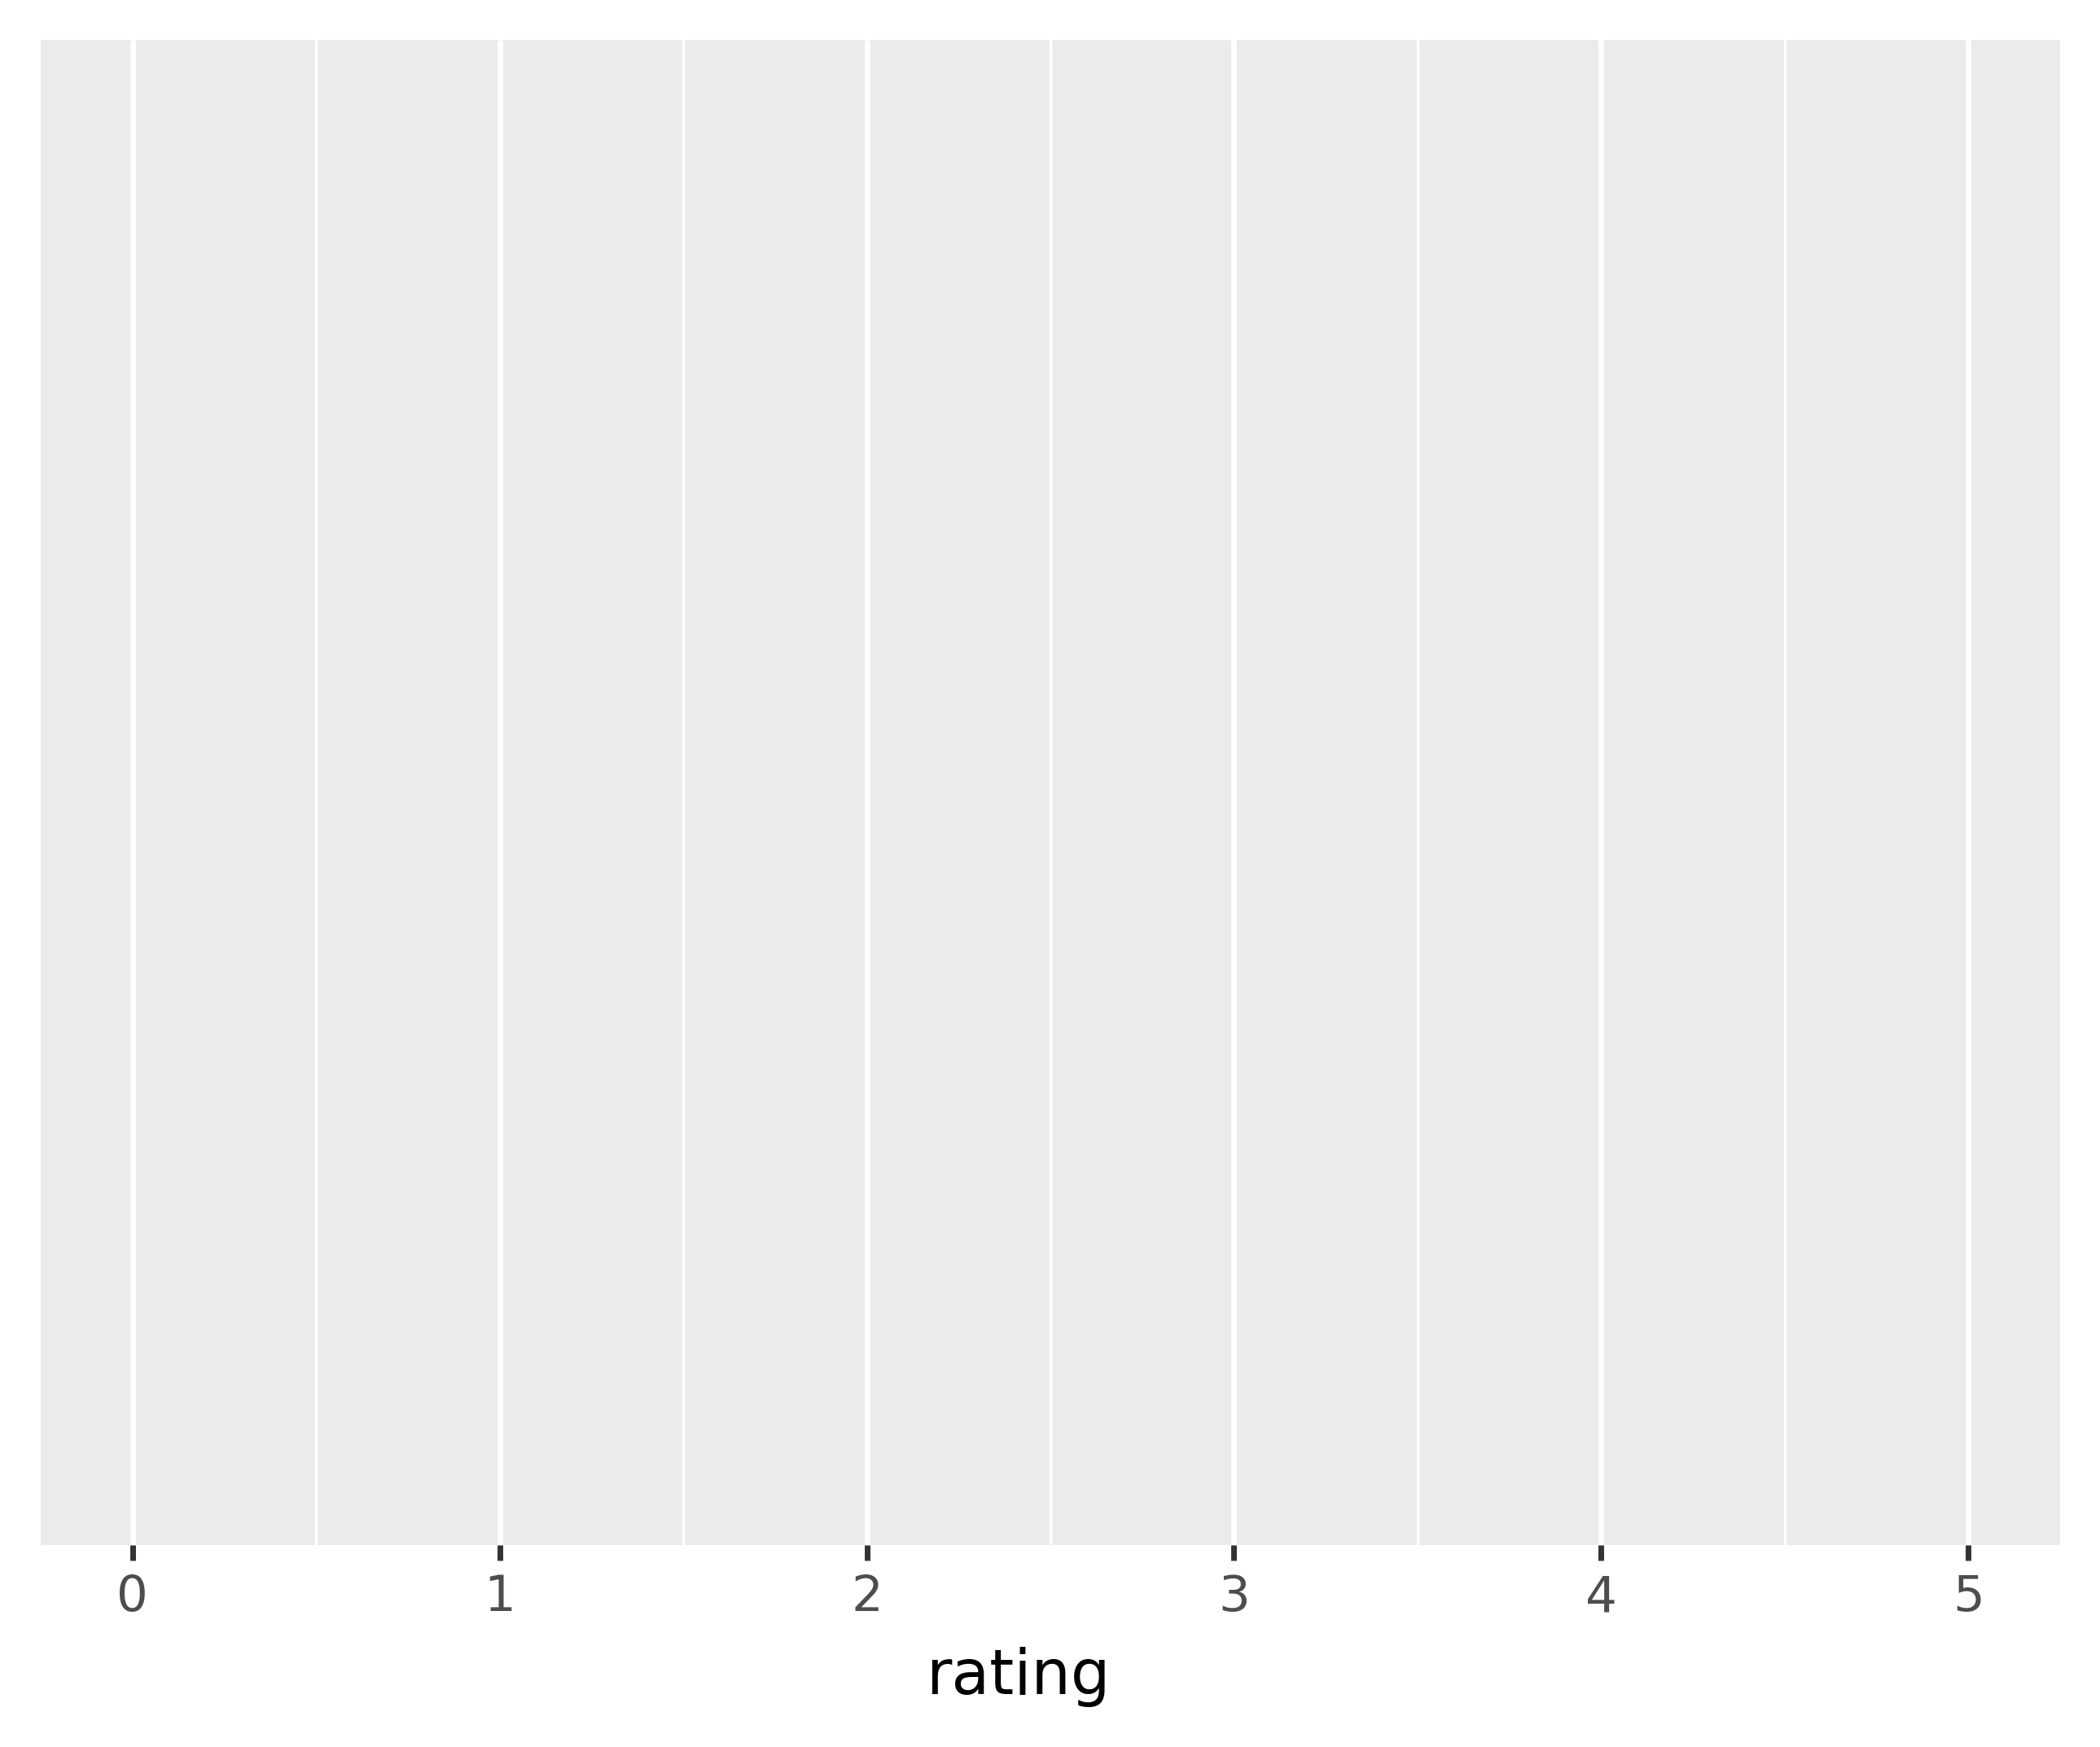

<ggplot: (704525216)>

In [86]:
(p9.ggplot(epicurious_num_2, p9.aes(x = 'rating')))

## Histograms

If you run this chunk, a big, nearly blank box appears--there is no actual graph, but we can see that the `height` variable is now located on the $x$-axis. There's nothing there because we haven't added a **geom** yet. A geom is a command representing the type of plot we want. To add a histogram, we use `+ geom_histogram()` from `plotnine`. 

/Users/amynussbaum/opt/anaconda3/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 101'. Pick better value with 'binwidth'.


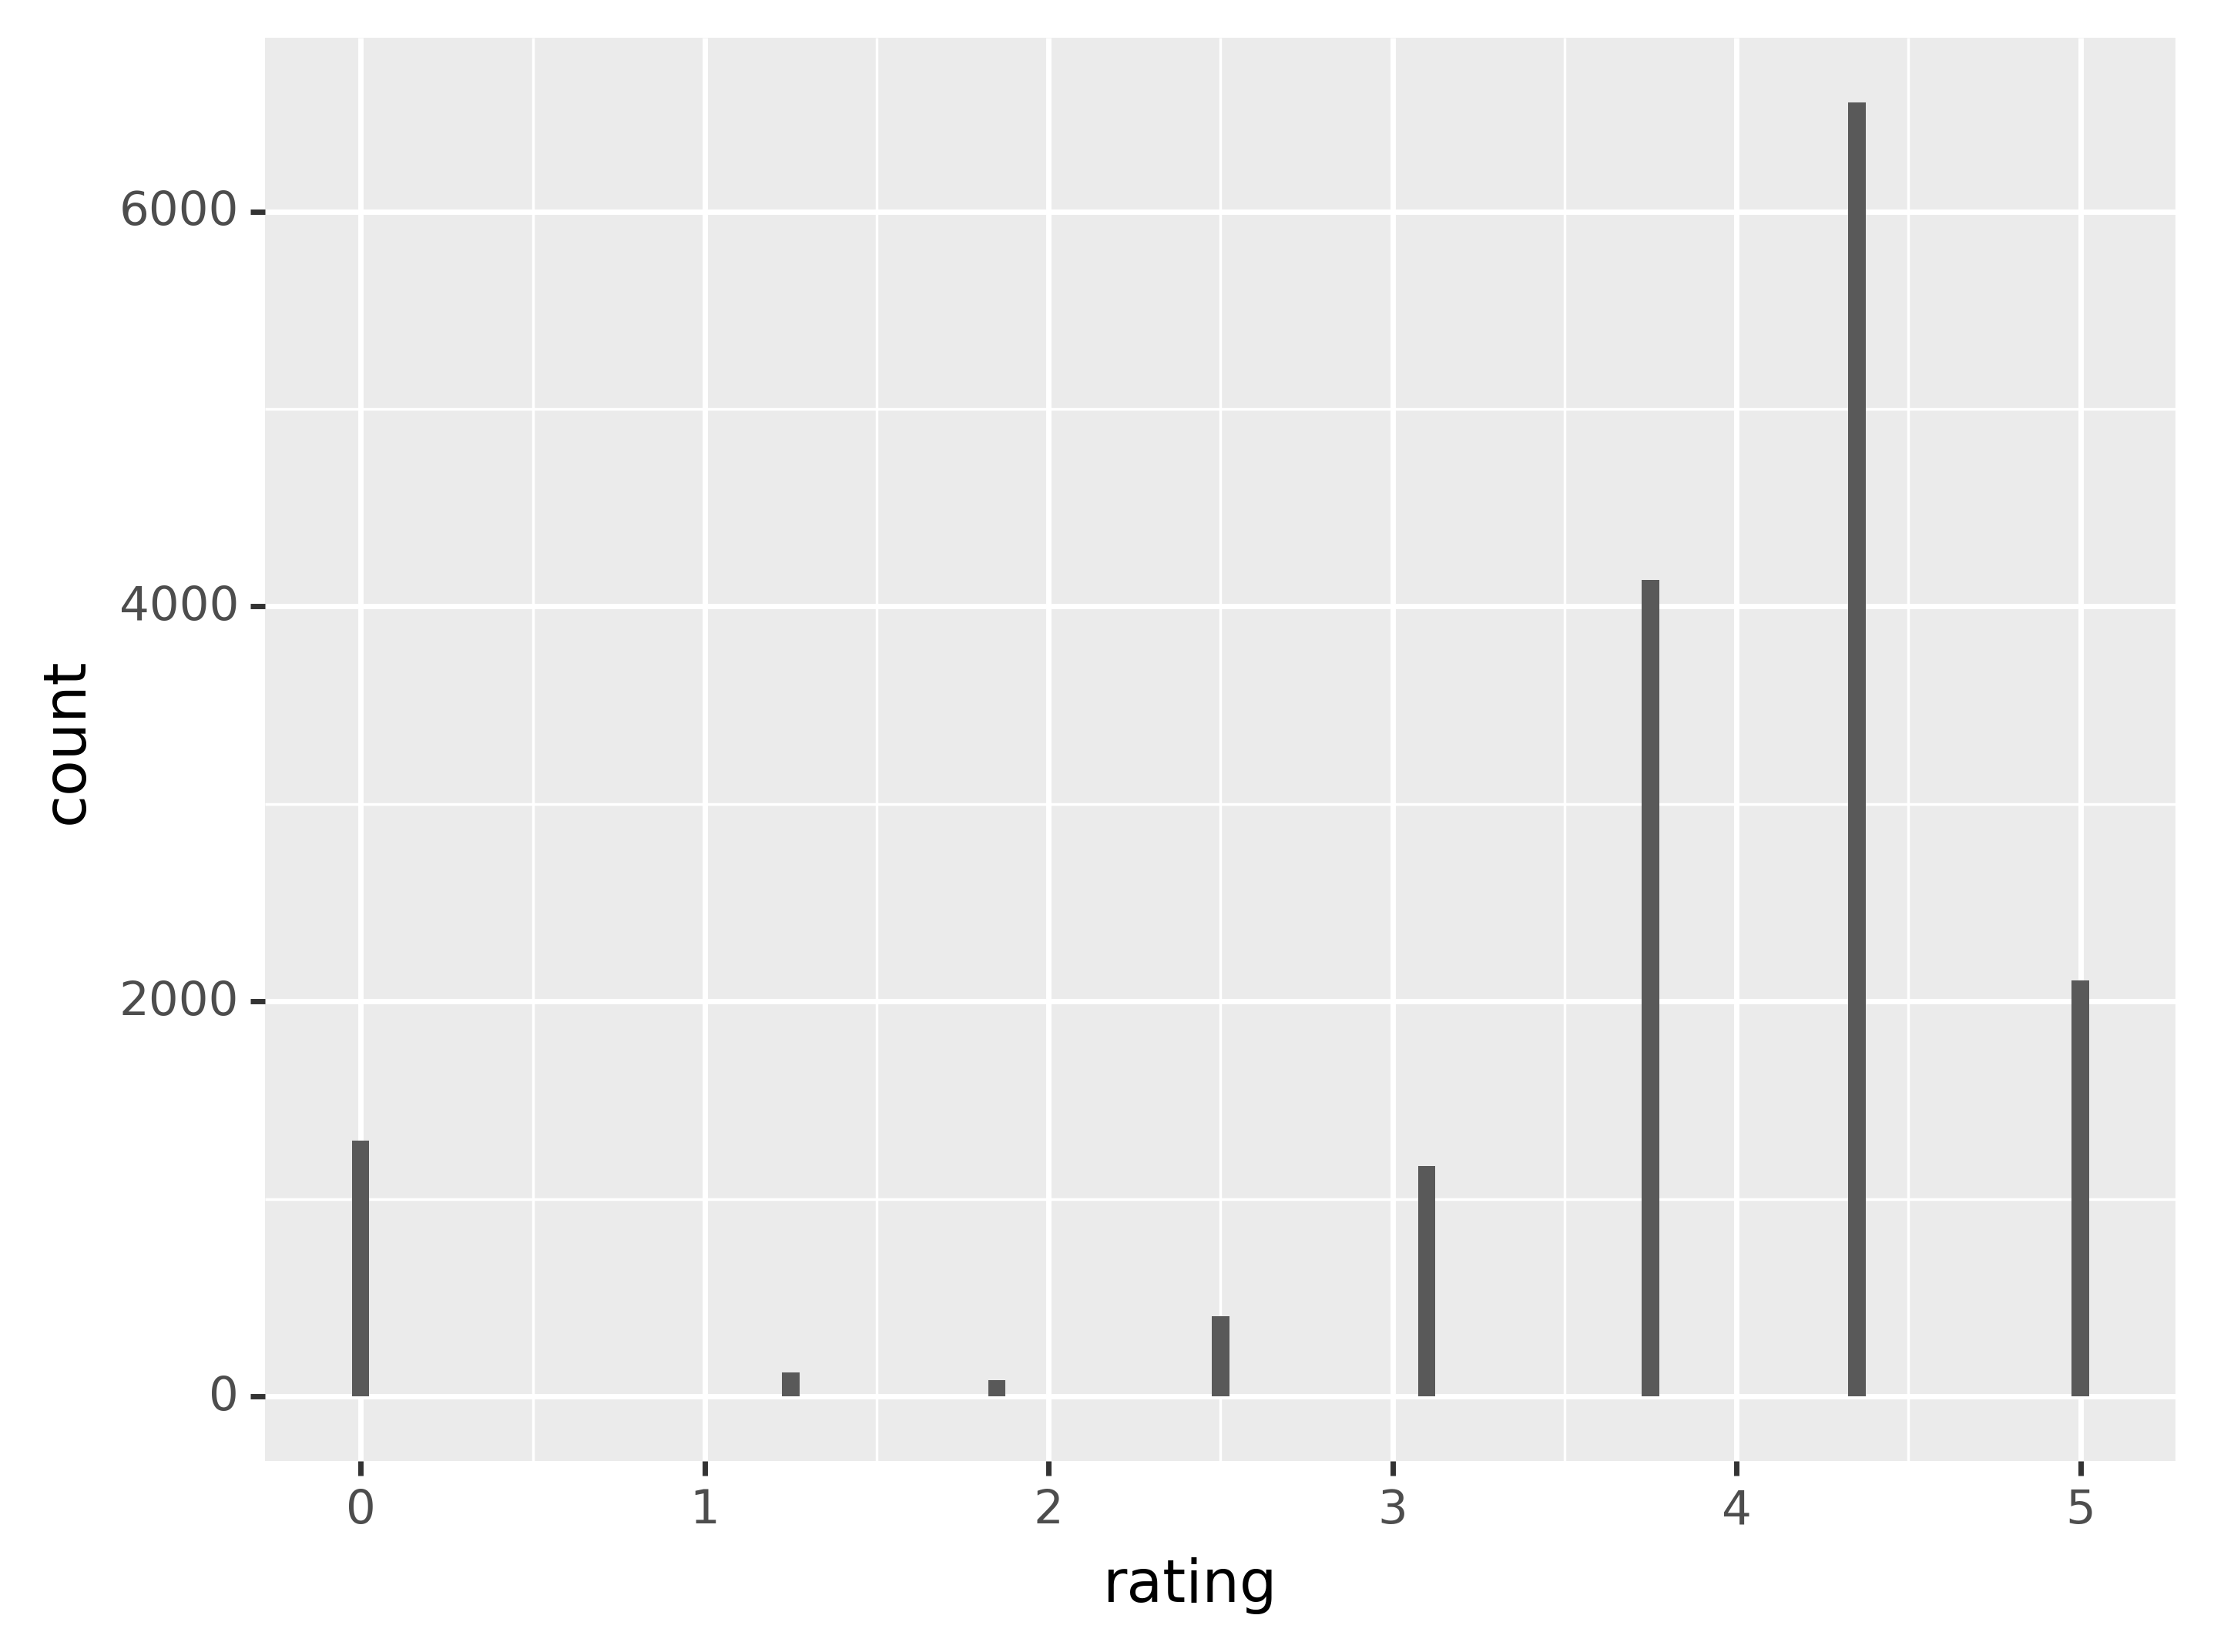

<ggplot: (697813830)>

In [79]:
(p9.ggplot(epicurious_num_2, p9.aes(x = 'rating')) 
 + p9.geom_histogram())

9. Do you see a warning message saying "`stat_bin() using bins = 30. Pick better value with binwidth`"? This error is unique to `geom_histogram()`. To fix the warning, we can change the number of bins by adding a new argument, `bins = 10`, into the "`geom_histogram()`" function. 

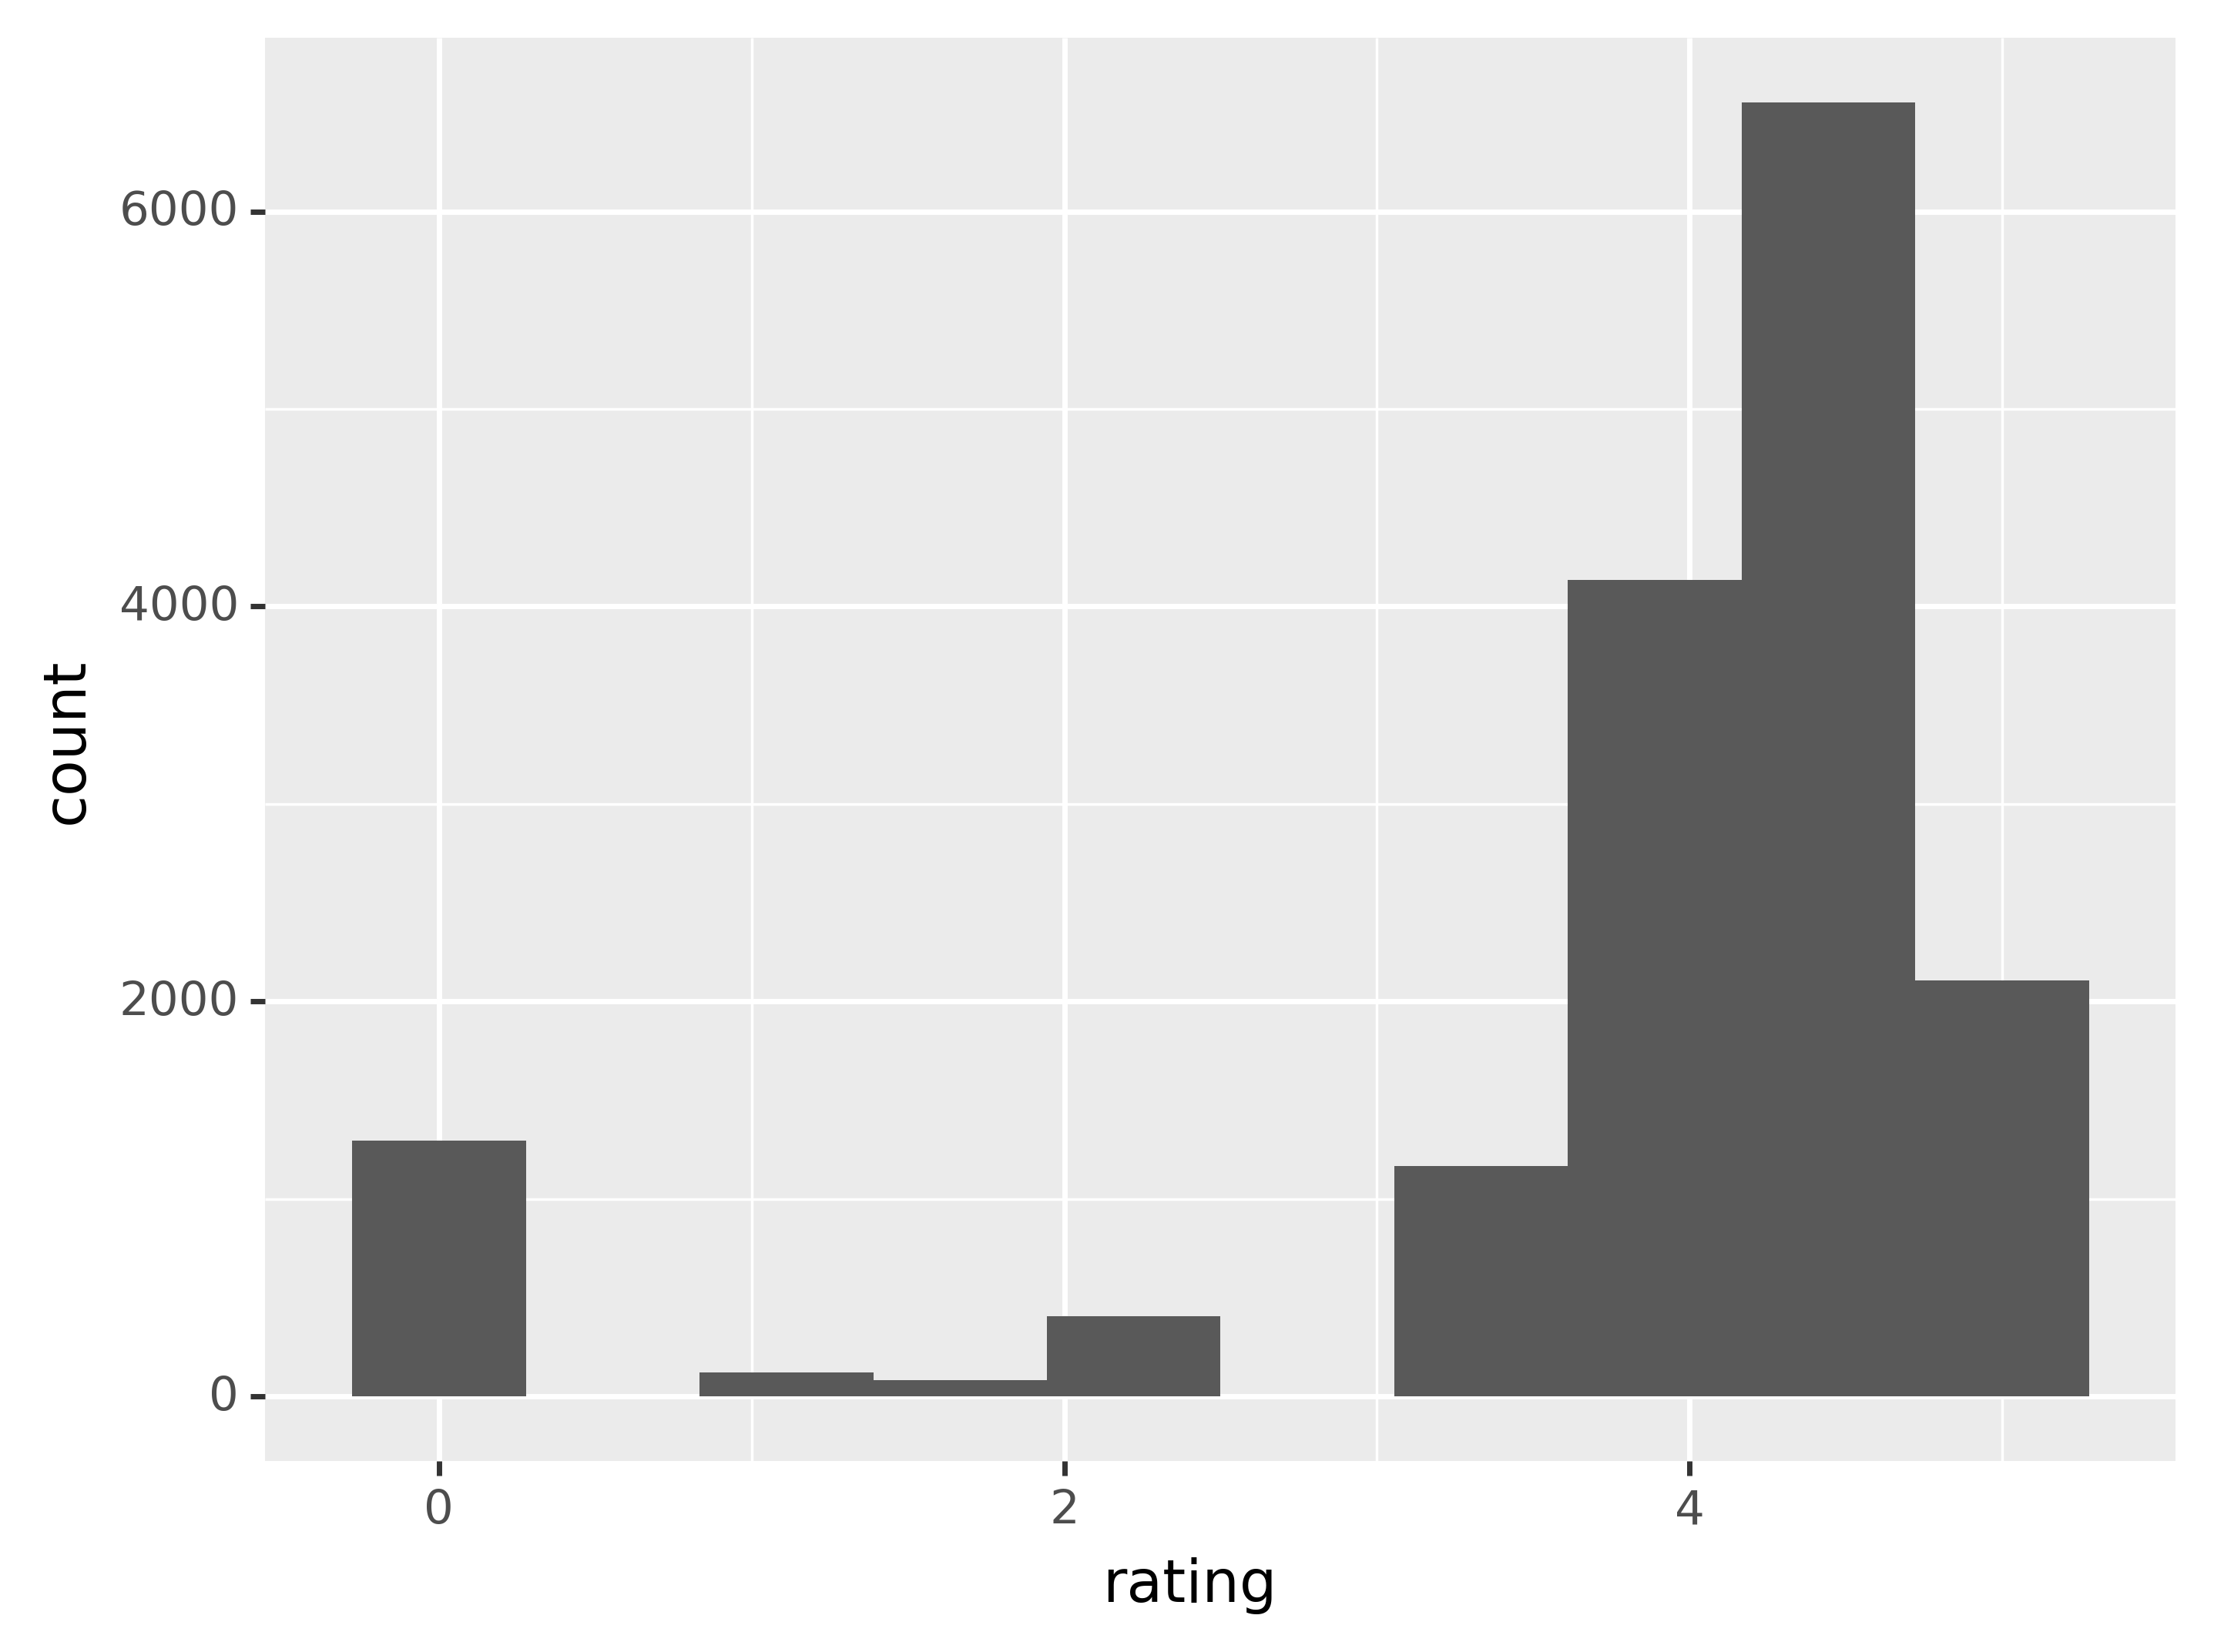

<ggplot: (704365921)>

In [87]:
(p9.ggplot(epicurious_num_2, p9.aes(x = 'rating')) 
+ p9.geom_histogram(bins = 10))

10. What happens to the histogram? Would you describe it in the same way as you described your first histogram? Are there any differences?



\textcolor{blue}{It looks mostly similar, although there are fewer empty spaces due to fewer empty bins.}

You can also avoid the message by specifying the `binwidth` instead of `bins`. There is a direct relationship between the bin width and the number of bins, so setting one also fixes the other. In general, increasing the number of bins leads to narrower wins, and decreasing the number of bins leads to wider bins.

11. Instead of creating a histogram with 10 bins, create a histogram where the bin width is 0.5. 

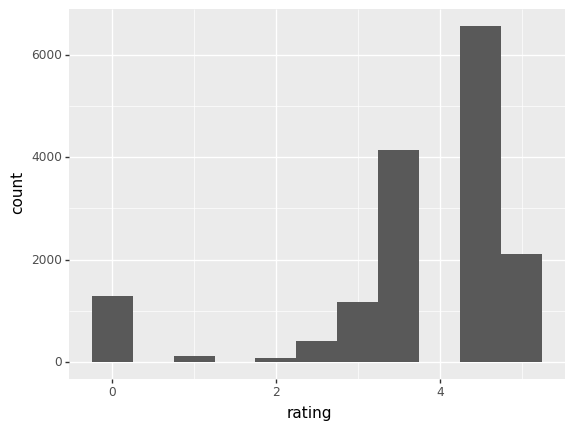

<ggplot: (381084447)>

In [16]:
(p9.ggplot(epicurious_num_2, p9.aes(x = 'rating')) 
 + p9.geom_histogram(binwidth = 0.5))

Notice that on the $y$-axis, we are displaying the counts of the observations in each bin. We can change this to instead display the frequency by adding another argument to `ggplot()`.

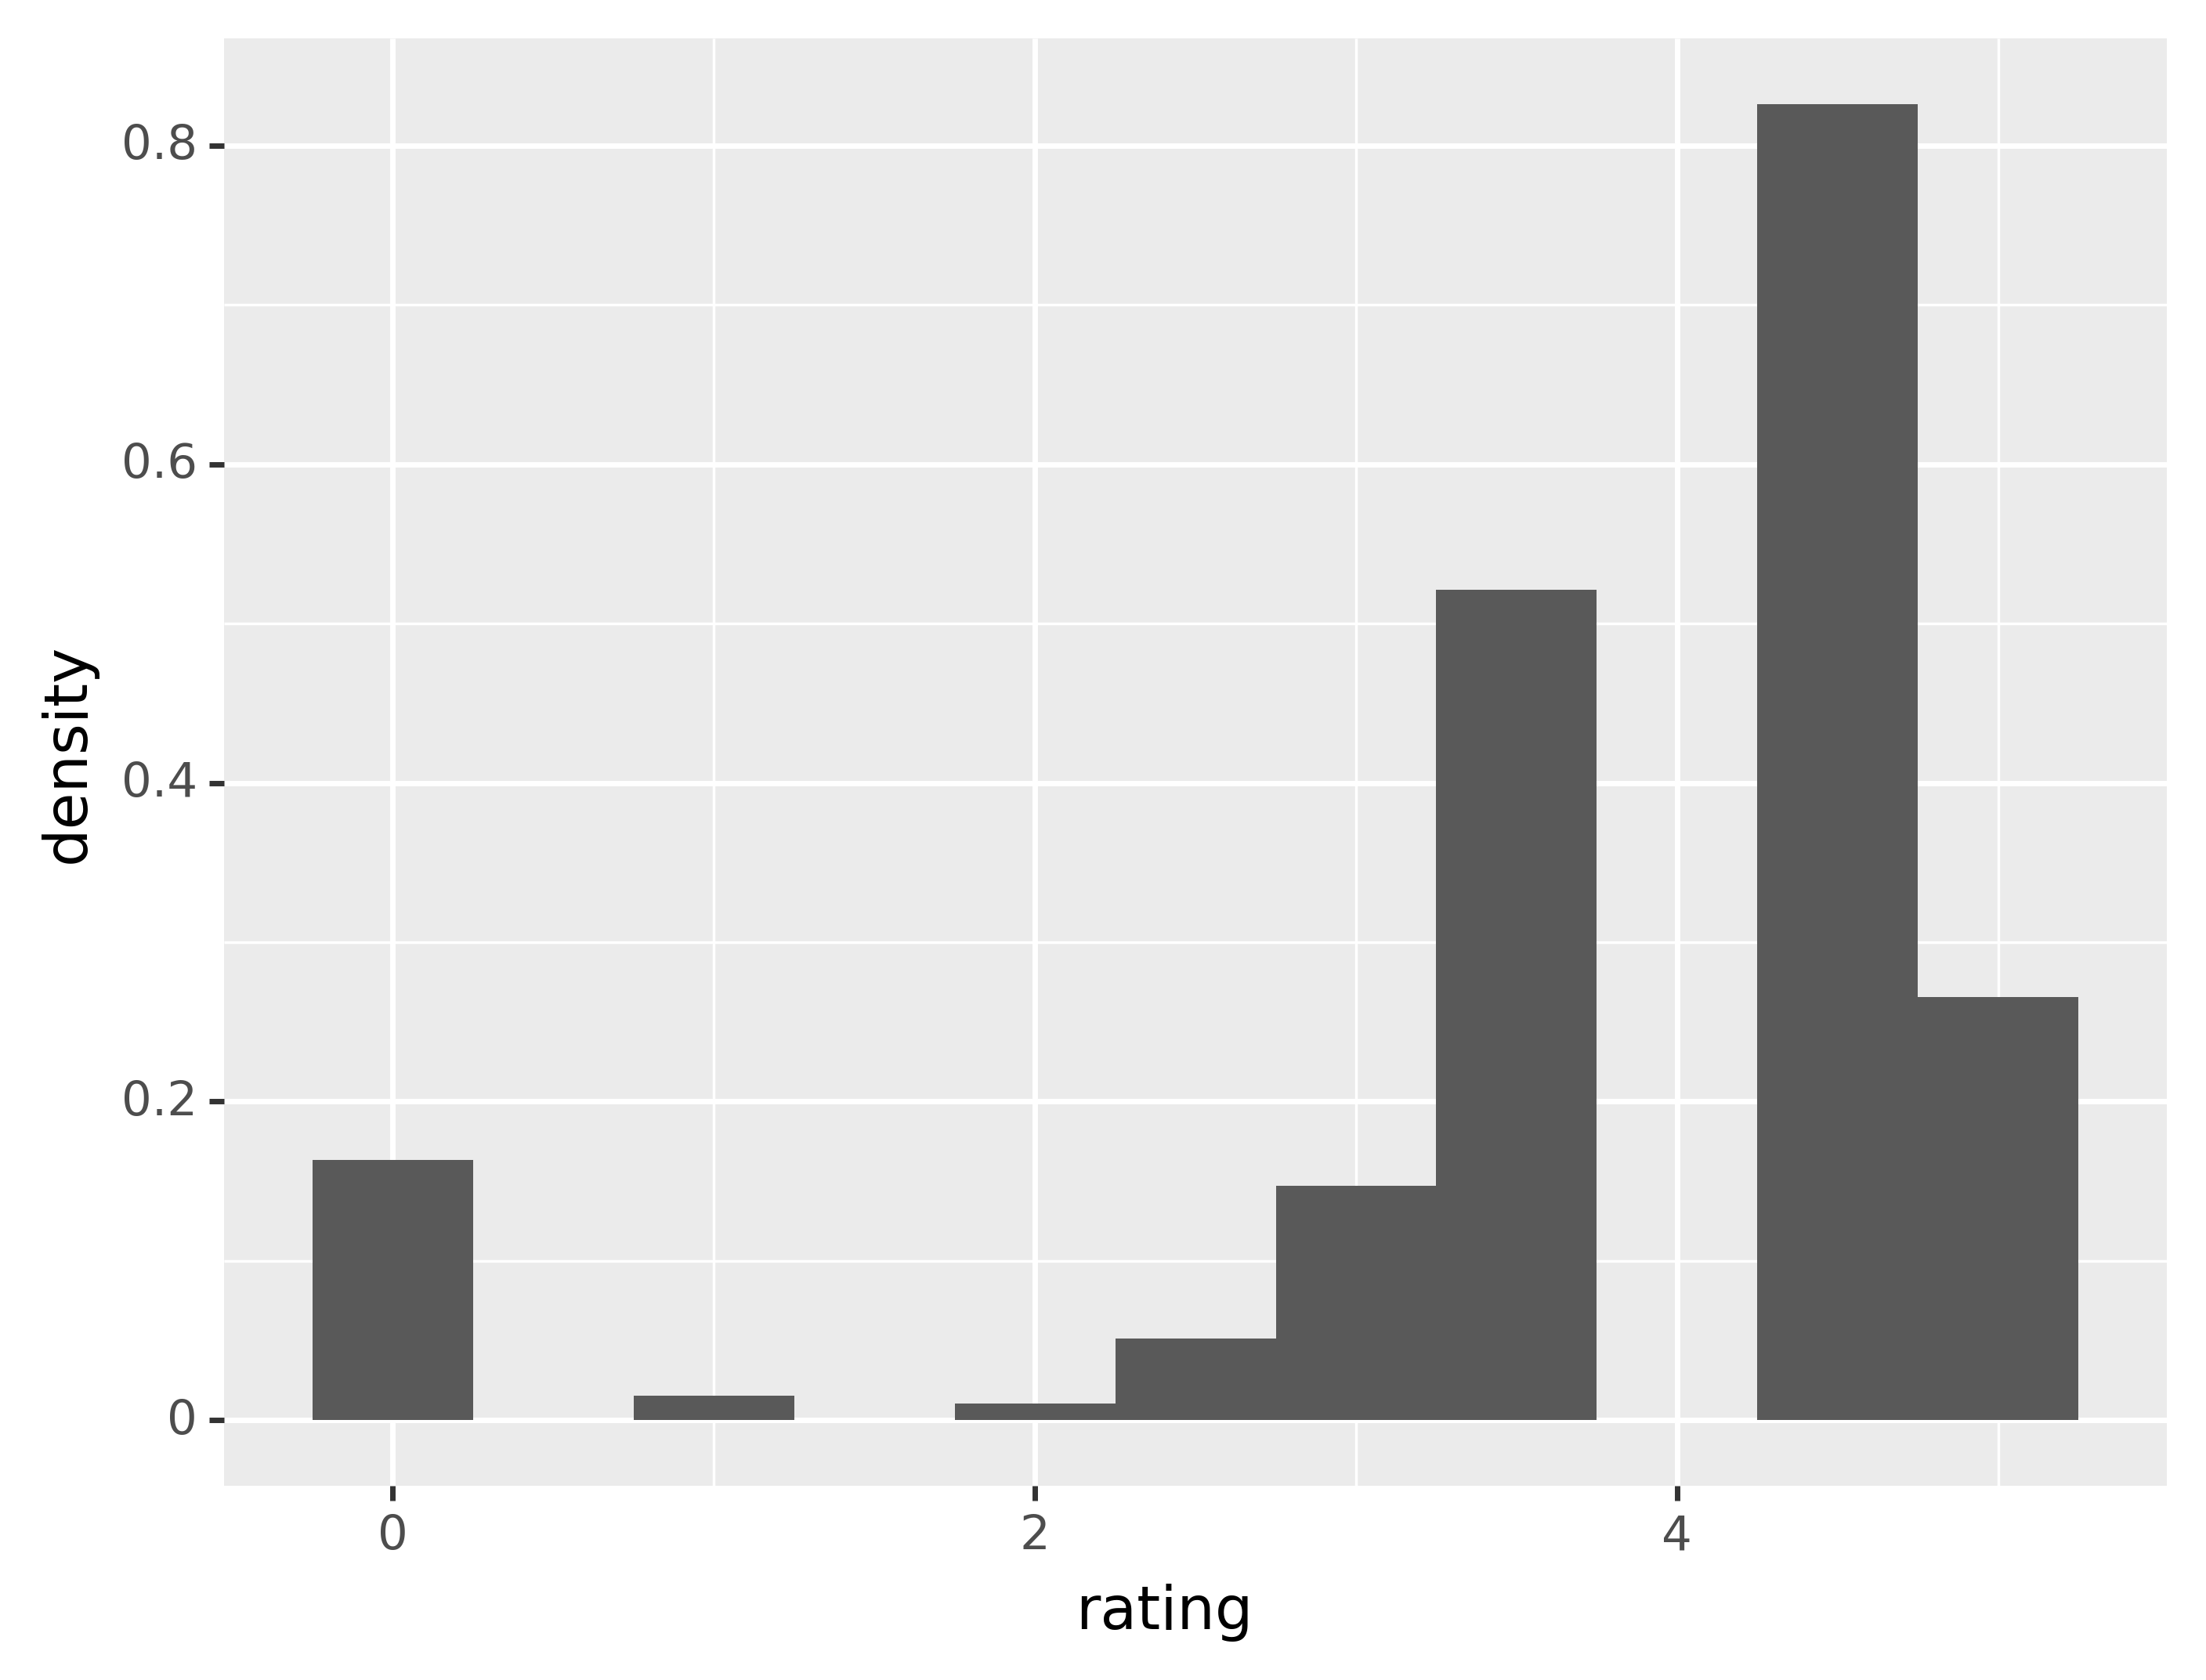

<ggplot: (709185576)>

In [88]:
(p9.ggplot(epicurious_num_2, p9.aes(x = 'rating', y=p9.after_stat('density'))) 
 + p9.geom_histogram(binwidth = 0.5))

Now, let's actually add a density--

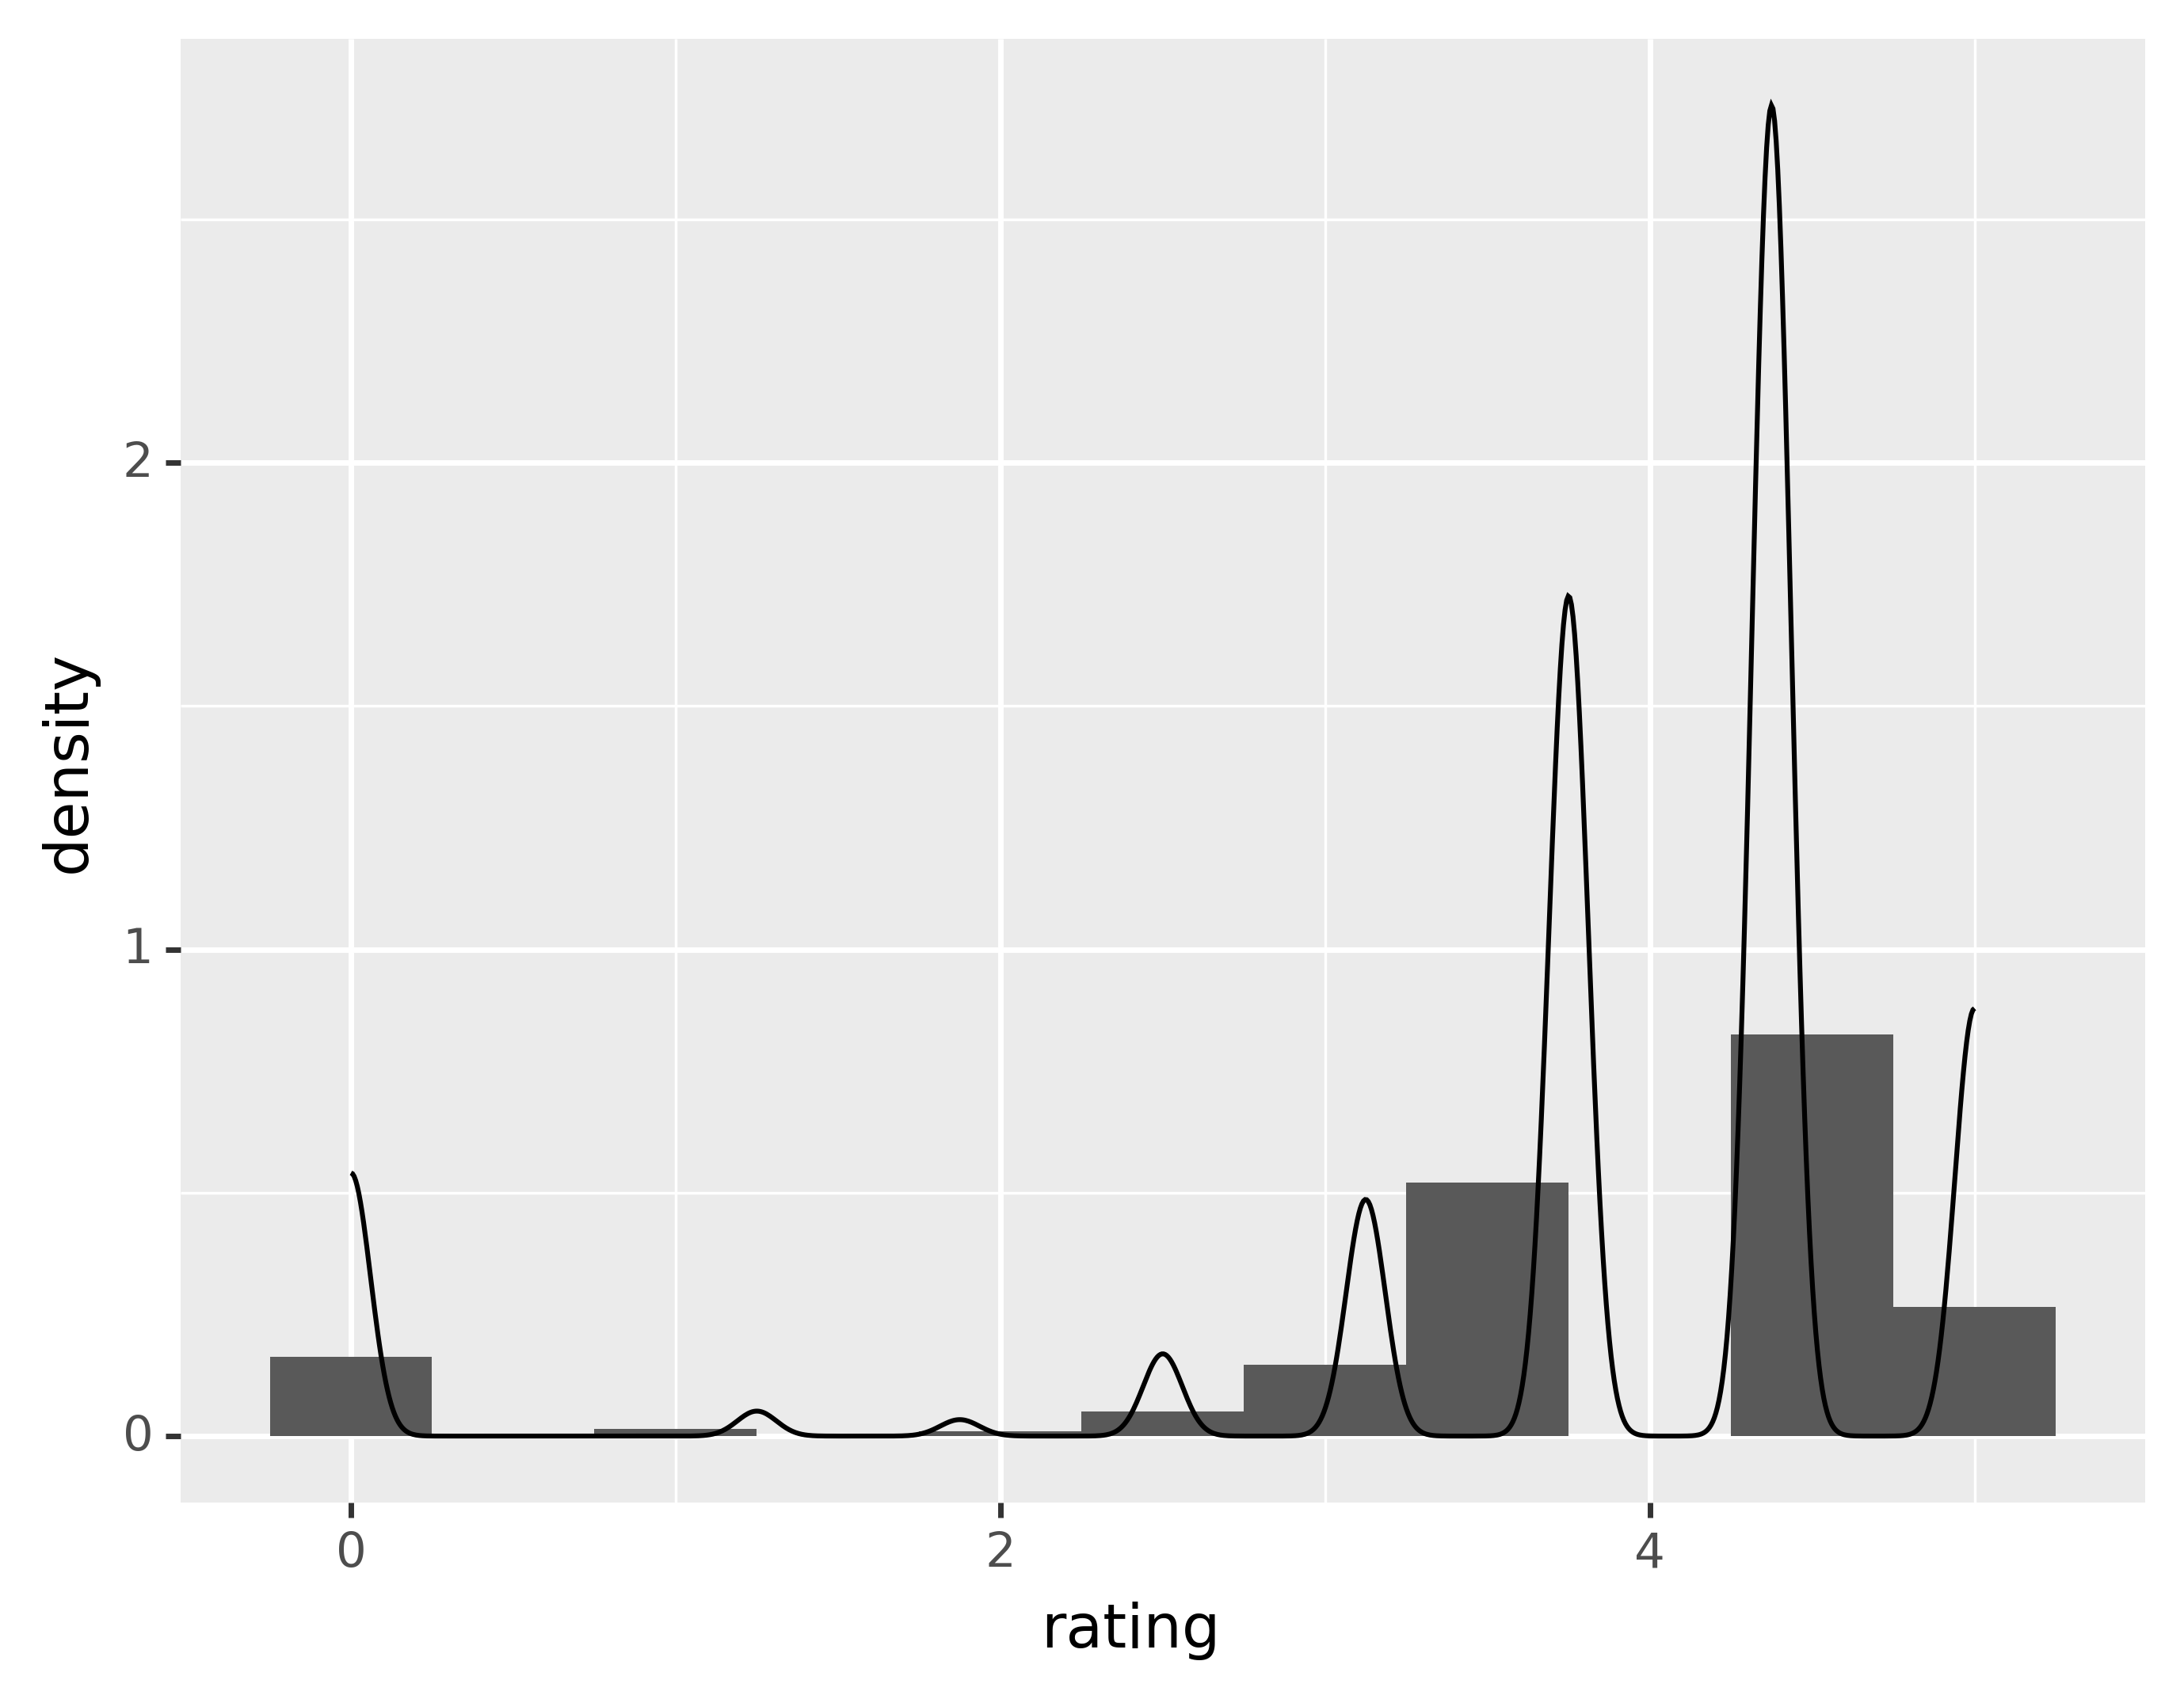

<ggplot: (710758563)>

In [89]:
(p9.ggplot(epicurious_num_2, p9.aes(x = 'rating', y=p9.after_stat('density'))) 
 + p9.geom_histogram(binwidth = 0.5) 
 + p9.geom_density())

We can see two things from this latest graph--

A. There is a relationship between a histogram and a density plot! When created from the same dataset, they should show roughly the same shape. 
B. You can add multiple geoms to a graph! In fact, this is how we build the graphs--by supplying the dataset and variable mapping in the first `ggplot()` command, then by adding different things using different geoms. In this case, we added both a histogram (`geom_histogram()`) and a density (`geom_density()`). 

12. Now, try creating your own combination histogram/density plot for the variable `calories`. Describe the distribution. 


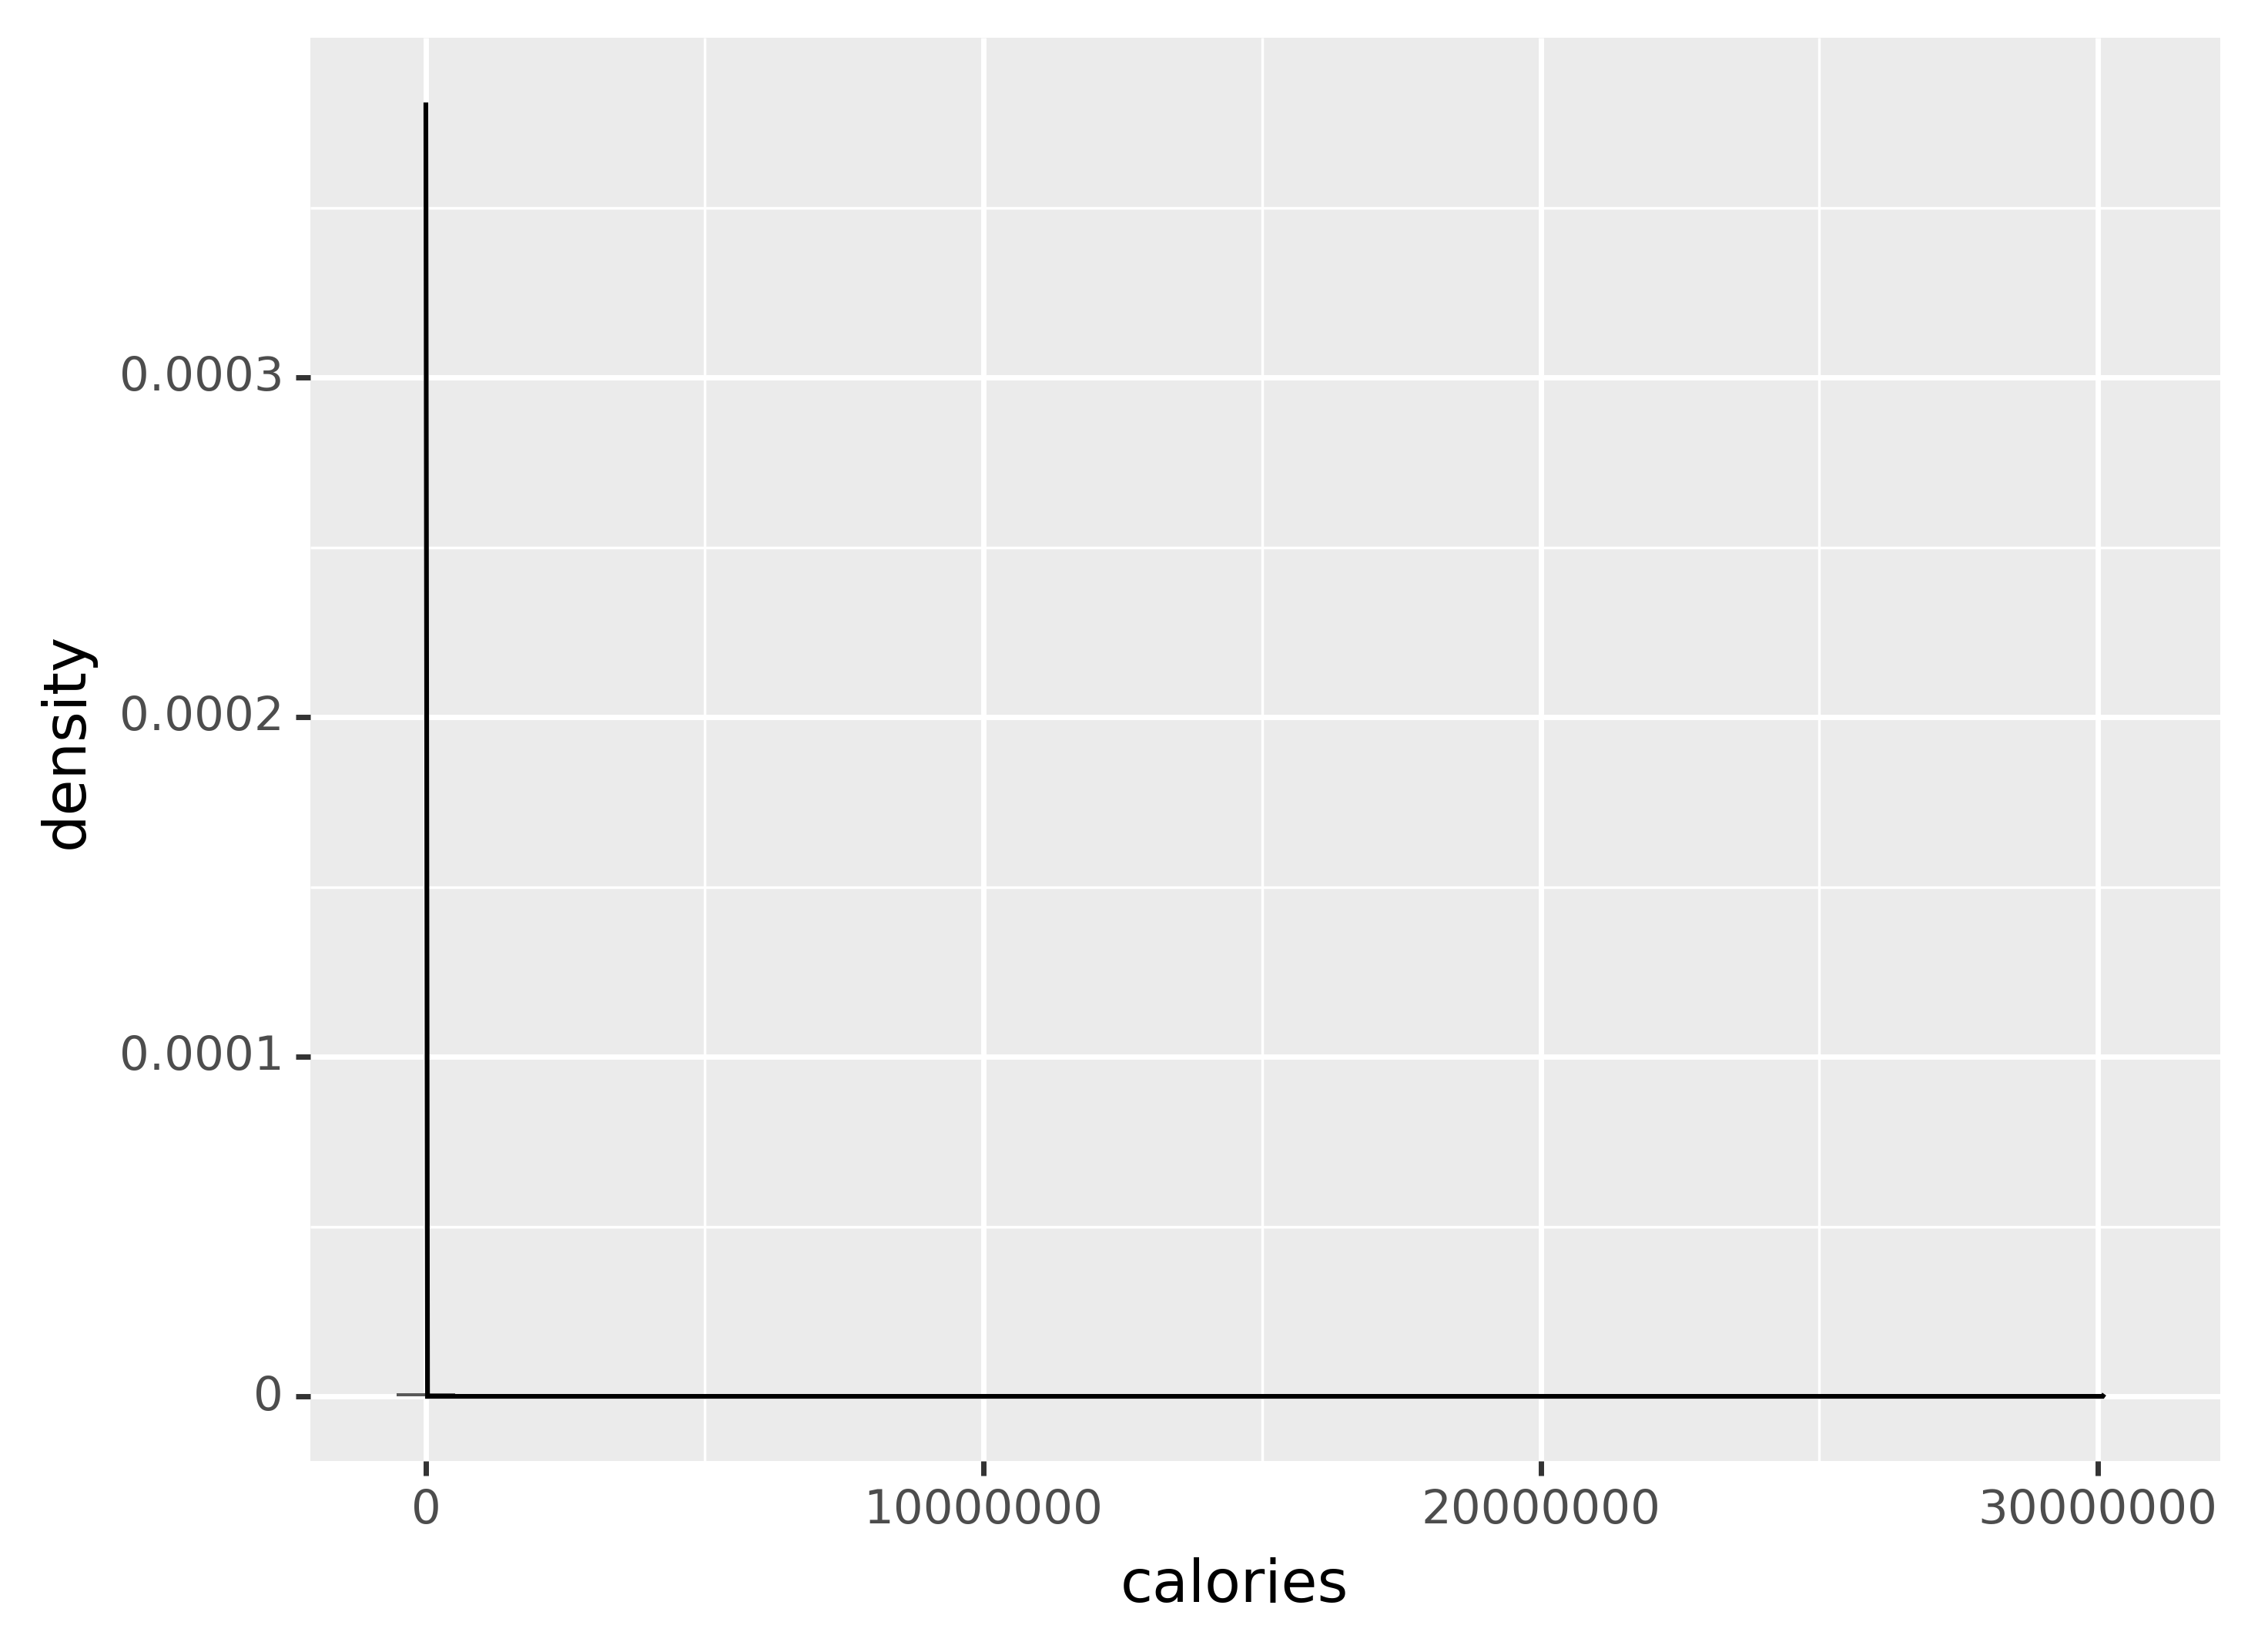

<ggplot: (710767556)>

In [90]:
(p9.ggplot(epicurious_num_2, p9.aes(x = 'calories', y=p9.after_stat('density'))) 
 + p9.geom_histogram(bins = 30) 
 + p9.geom_density())

\textcolor{blue}{The distribution appears to be "L"-shaped, with big stacks close to 0 and a few extremely large values.}

13. Hopefully you have arrived at the conclusion that some of these values seem very unreasonable. Let's take a closer look--create histograms for each of the other numeric variables. Make sure that you are able to write reasonable captions for each plot. What do you see?

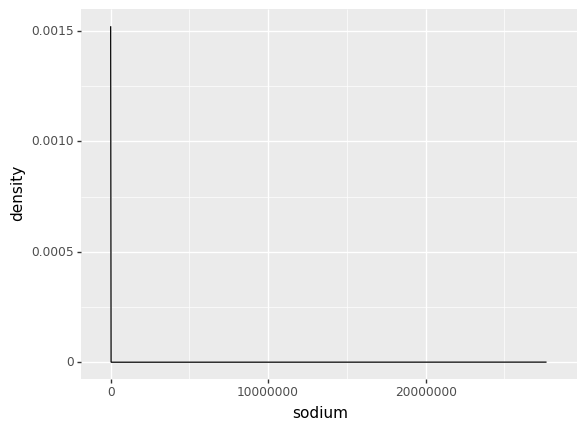

<ggplot: (381232258)>

In [20]:
(p9.ggplot(epicurious_num_2, p9.aes(x = 'protein', y=p9.after_stat('density'))) 
 + p9.geom_histogram(bins = 30) + p9.geom_density())
(p9.ggplot(epicurious_num_2, p9.aes(x = 'fat', y=p9.after_stat('density'))) 
 + p9.geom_histogram(bins = 30) + p9.geom_density())
(p9.ggplot(epicurious_num_2, p9.aes(x = 'sodium', y=p9.after_stat('density'))) 
 + p9.geom_histogram(bins = 30) + p9.geom_density())

\textcolor{blue}{The same phenomenon--these distributions are skewed by extremely large values.}

14. Between the mean and the histograms, you should be able to see that the distributions are being skewed by a handful of extreme values. Find the top ten largest values for `calories`, `protein`, `fat`, and `sodium`. Which recipes do they correspond to? Does the calorie count make sense knowing what the recipes were for?

In [69]:
maxcal = epicurious_num_2['calories'].nlargest(n=10).index
maxpro = epicurious_num_2['protein'].nlargest(n=10).index
maxfat = epicurious_num_2['fat'].nlargest(n=10).index
maxsod = epicurious_num_2['sodium'].nlargest(n=10).index

maxvals = set().union(maxcal, maxpro, maxfat, maxsod)

epicurious_num_2.loc[list(maxvals),]

,title,rating,calories,protein,fat,sodium,cake
6368,Deep-Dish Wild Blueberry Pie,4.375,29997918.0,200210.0,1716279.0,27570999.0,0.0
2976,Lamb Köfte with Tarator Sauce,5.000,4518216.0,166471.0,44198.0,7540990.0,0.0
6912,Chocolate-Almond Pie,3.125,3358273.0,58334.0,186660.0,3449512.0,0.0
9731,"Rice Pilaf with Lamb, Carrots, and Raisins",5.000,4157357.0,236489.0,221495.0,3134853.0,0.0
8192,Grilled Lamb Chops with Porcini Mustard,5.000,24117.0,940.0,2228.0,4382.0,0.0
11391,Pear-Cranberry Mincemeat Lattice Pie,4.375,30111218.0,200968.0,1722763.0,27675110.0,0.0
3275,Whole Branzino Roasted in Salt,5.000,417.0,53.0,20.0,132220.0,0.0
16208,Merguez Lamb Patties with Golden Raisin Couscous,4.375,54512.0,2074.0,595.0,3983.0,0.0
5138,Caramelized Apple and Pear Pie,3.125,3358029.0,58324.0,186642.0,3449373.0,0.0
1304,"Rice Pilaf with Lamb, Carrots, and Raisins",5.000,4157357.0,236489.0,221495.0,3134853.0,0.0


\textcolor{blue}{These results are interesting! Some of them are likely data entry errors--I don't think that the Deep-Dish Wild Blueberry Pie has almost 30 million calories, for example. Some of them, like Grilled Lamb Chops with Porcini Mustard, are duplicates, which we should have also checked for! Finally, there are two that stick out to me--Whole Branzino Roasted in Salt and Red Snapper Baked in Salt with Romesco Sauce have "normal" values for }`calories`\textcolor{blue}{,} `protein`\textcolor{blue}{, and} `fat`\textcolor{blue}{, but extremely high values for }`sodium`\textcolor{blue}{. This makes sense based on the cooking method... there probably is an absurd amount of salt and therefore sodium in the recipes, but it likely gets rinsed off before actually consuming the food (the actual recipes are blocked by a paywall but here is a }[recipe using a similar technique](https://www.seriouseats.com/salt-baked-whole-fish-with-fresh-herbs-5212108)\textcolor{blue}{, scroll through the pictures to see what I mean!). A case where the outliers are interesting, valuable, and maybe should not be deleted.}

15. Now, remove the rows containing those values. Save the remaining values in a new data frame called `epicurious_num_3`. Remake the histograms and note the changes in the distributions. 

In [70]:
## I also dropped duplicate rows!
epicurious_num_3 = epicurious_num_2.drop(labels = maxvals, axis=0).drop_duplicates()

(14422, 7)

## Scatterplots

16. Let's continue to the last type of graph we will review for this lab, the scatterplot. This time, try using the [ggplot2 cheat sheet](https://rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf) to look up the appropriate geom you need (the cheat sheet is written from R, but you should be able to convert to Python relatively easily). Create a plot displaying the relationship between `calories` and `fat`. Notice that unlike the other plots we have created, such as histograms and densities, you *have* to supply an `x` and a `y` aesthetic. Remember that $x$ is traditionally the explanatory variable and $y$ is traditionally the response--which one makes sense to use as the explanatory variable here?


\textcolor{blue}{Adding fatty ingredients (or more of a particular fatty ingredient) increases the calories, so it makes sense to have `fat` on the $x$-axis.}

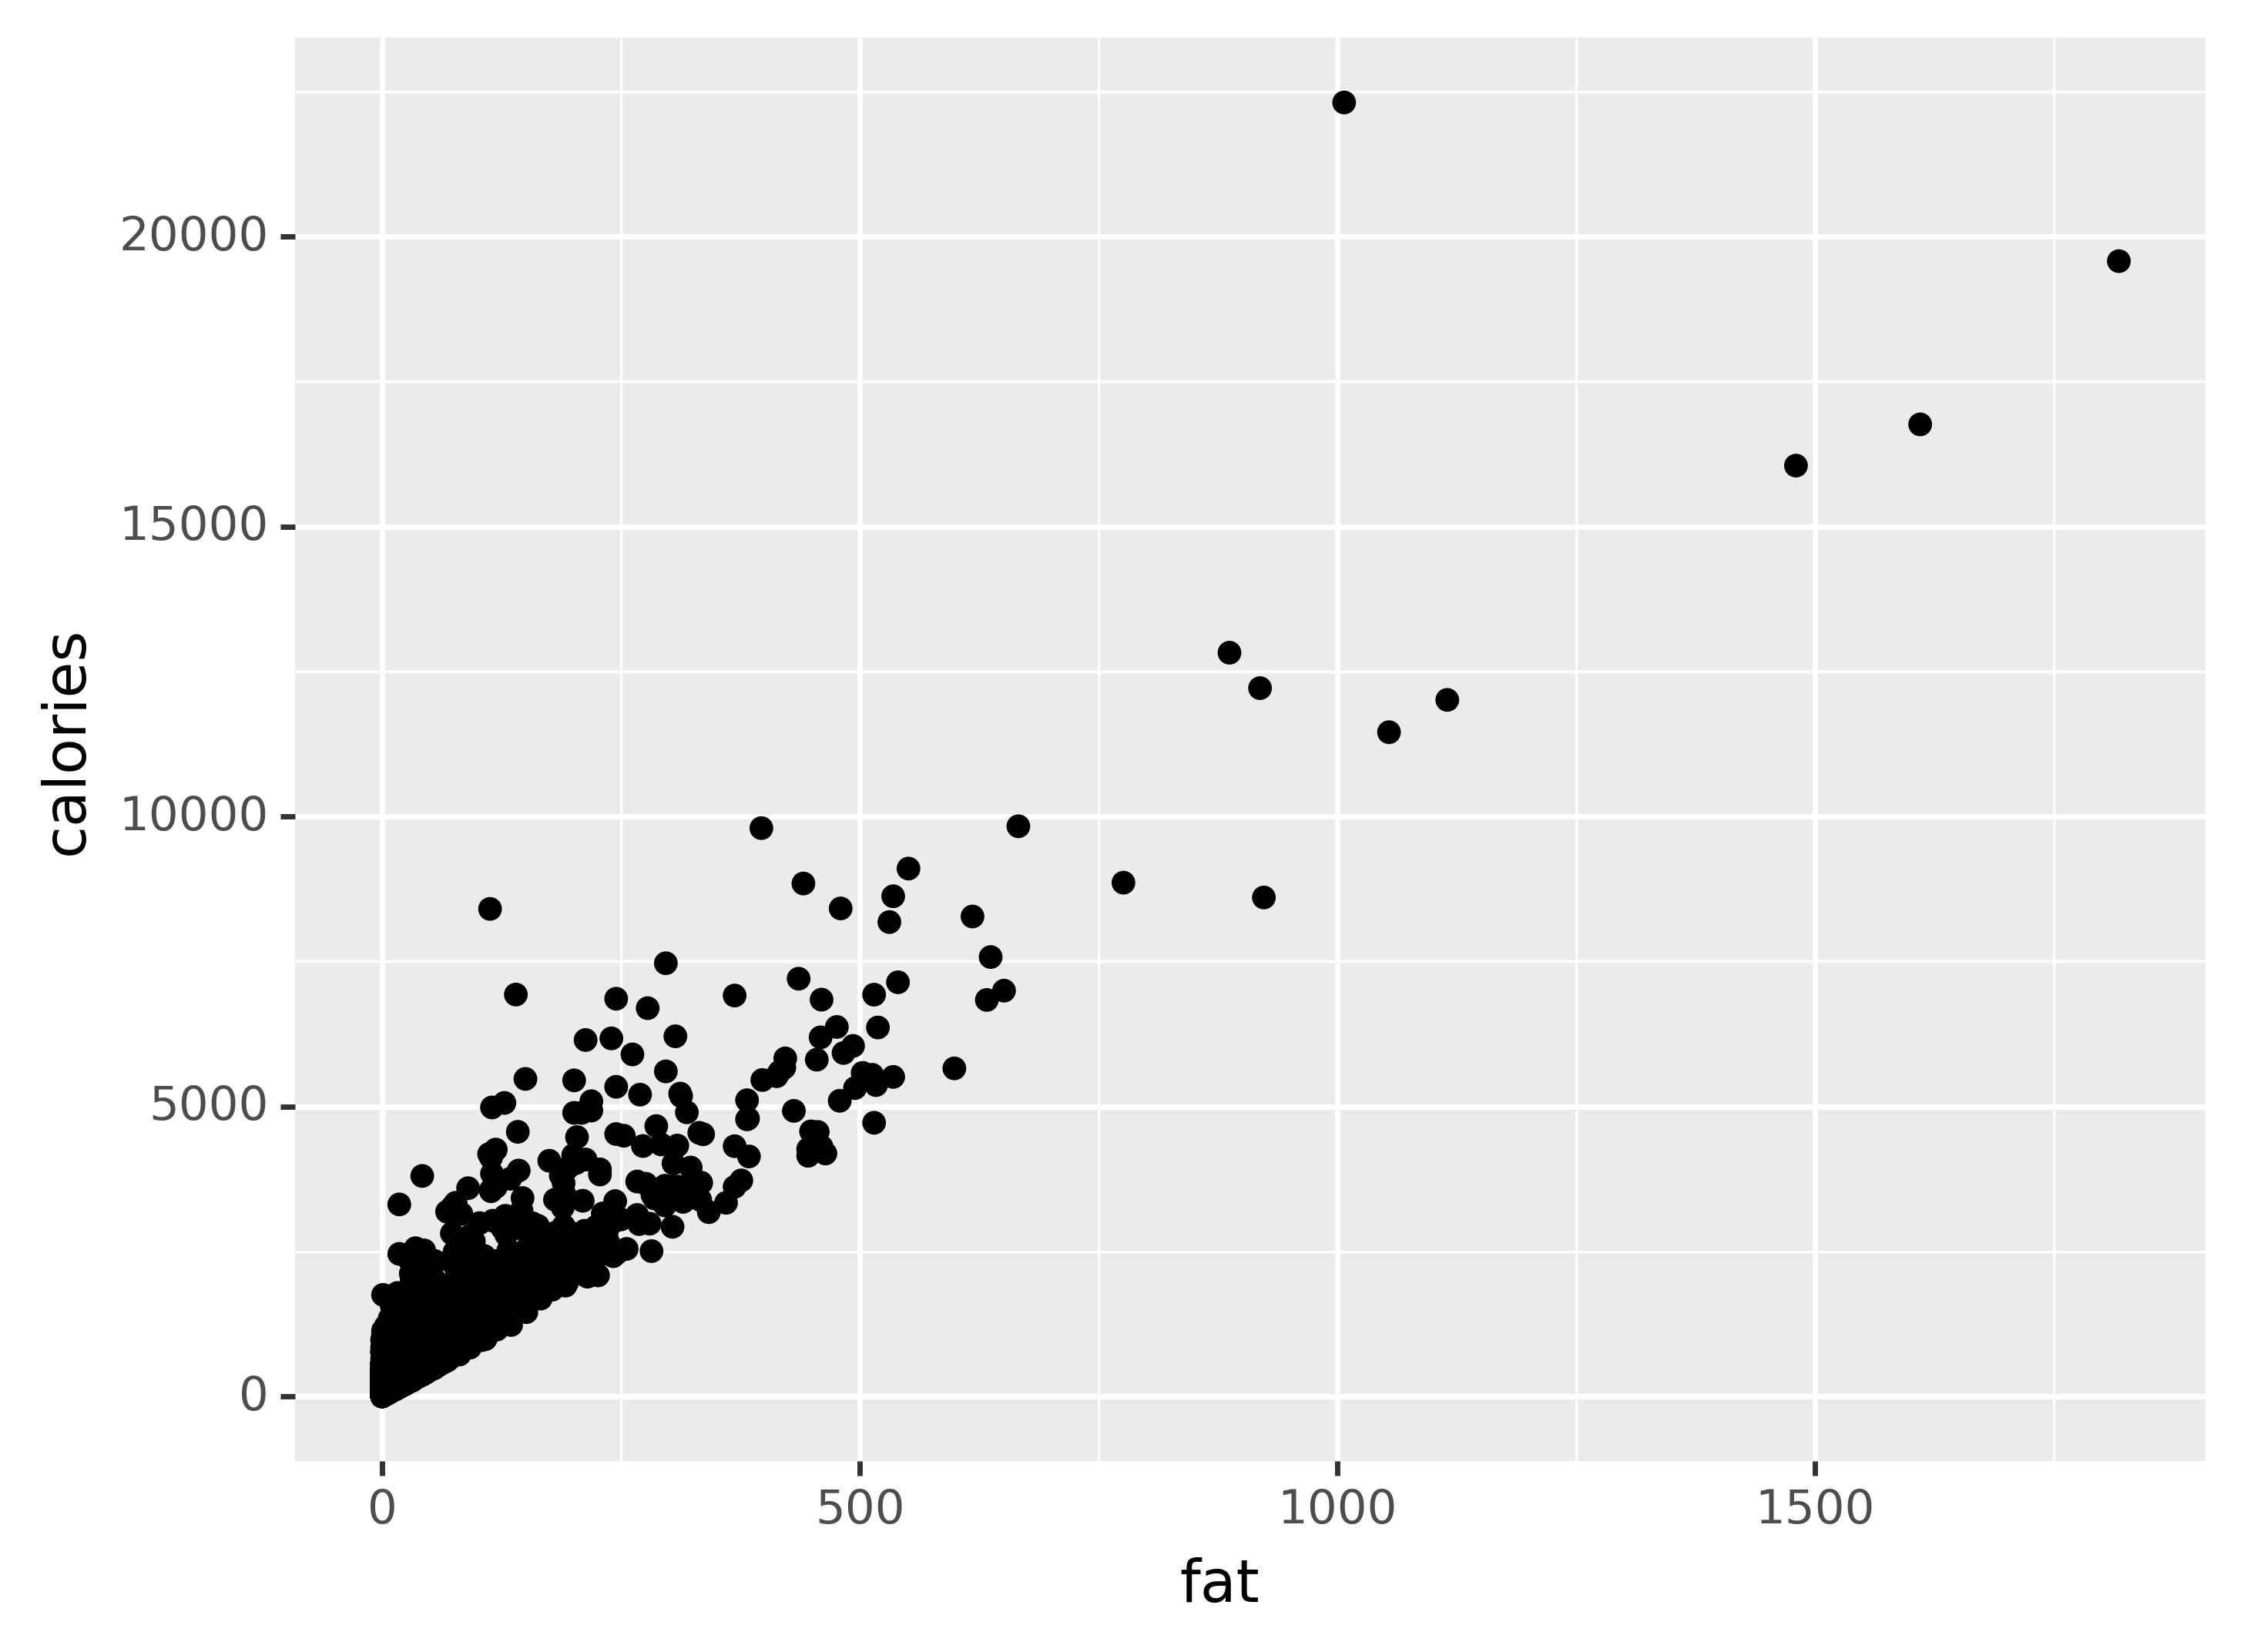

<ggplot: (704525249)>

In [85]:
(p9.ggplot(epicurious_num_3, p9.aes(x = 'fat', y = 'calories')) 
 + p9.geom_point())


17. Describe this relationship in terms of its form, direction, strength, and unusual values. Google the relationship between calories and fat. Does this plot make sense in light of what we know about those two variables?

\textcolor{blue}{The relationship between }`fat` \textcolor{blue}{and} `calories` \textcolor{blue}{ is a positive, mostly linear relationship. It is moderately strong. There are a few extreme values, but they are more or less following the overall pattern. It is interesting because there is an existing relationship between fat and calories--each gram of fat has nine calories, so there is a line with slope 9 that represents a hard cut-off on the plot.}

18. Let's get a little fancier. Now try adding a `color = "red"` argument to the `geom_point()` statement. 

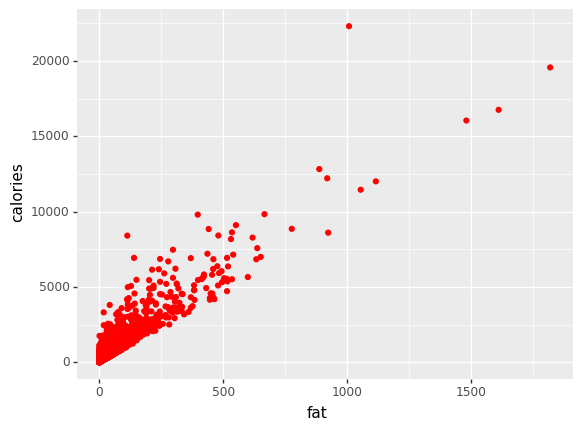

<ggplot: (697745637)>

In [72]:
(p9.ggplot(epicurious_num_3, p9.aes(x = 'fat', y = 'calories')) 
 + p9.geom_point(color = "red"))

19. This looks kind of messy, but you should have managed to change the color! Now try changing the color to something different. You might be able to use this [R color guide](http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf) to look up the available colors--but I haven't tested all of them to see if they work in Python, so no promises.


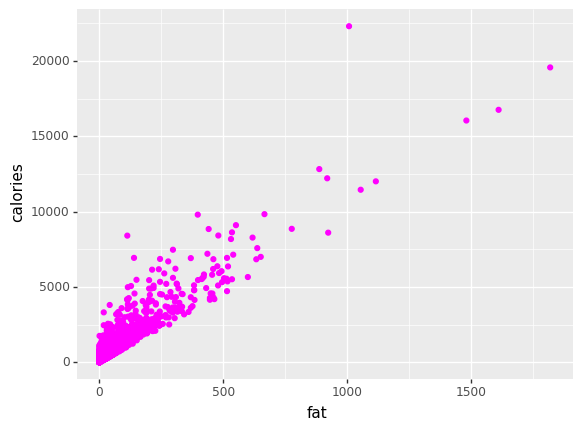

<ggplot: (697829117)>

In [73]:
(p9.ggplot(epicurious_num_3, p9.aes(x = 'fat', y = 'calories')) 
 + p9.geom_point(color = "magenta"))

On your assignments, you can pick whatever color you want! But in addition, you can change the color according to another variable for an additional encoding channel. To do this, you can change the `color` argument to be the name of a variable inside the `aes()` statement (rather than inside the geom).

20. Based on the following chunk, color the points according their average rating.


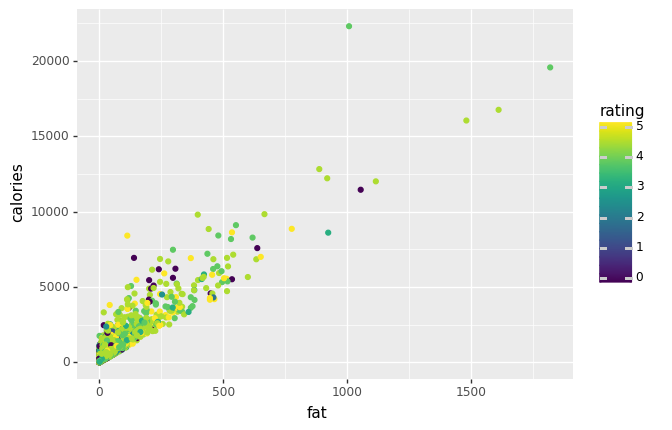

<ggplot: (698116889)>

In [74]:
(p9.ggplot(epicurious_num_3, p9.aes(x = 'fat', y = 'calories', color = 'rating')) 
 + p9.geom_point())

21. Does knowing the `rating` in the recipe add any additional information to the relationship?

\textcolor{blue}{Not particularly--there doesn't really appear to be a pattern in the color. The overall relationship between }`fat` \textcolor{blue}{ and } `calories` \textcolor{blue}{ dominates the graph.}

22. Now create a scatterplot beween `calories` and `protein`. Describe this relationship in terms of its form, direction, strength, and unusual values. Does *this* plot make sense in light of what we know about those two variables?

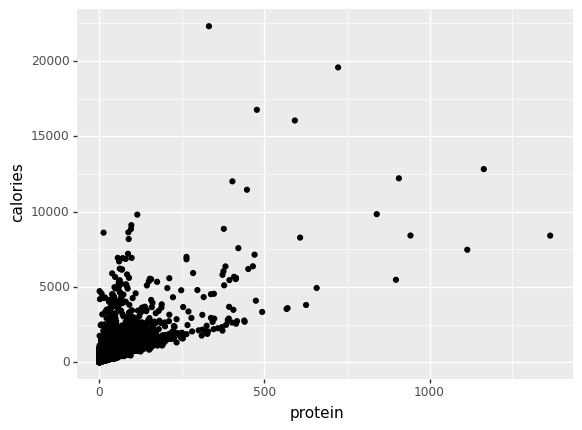

<ggplot: (698496266)>

In [75]:
(p9.ggplot(epicurious_num_3, p9.aes(x = 'protein', y = 'calories')) 
 + p9.geom_point())

\textcolor{blue}{The relationship between }`protein` \textcolor{blue}{ and } `calories` \textcolor{blue}{ is a positive, mostly linear relationship. It is moderately strong, but overall looks less strong than the relationship between }`fat` \textcolor{blue}{and} `calories` \textcolor{blue}{ (points have more variability). There are a few extreme values, but they are more or less following the overall pattern. Again, it is interesting because there is an existing relationship between protein and calories--each gram of protein has four calories, so there is a line with slope 4 that represents a hard cut-off on the plot.}

23. Finally, create a scatterplot between `calories` and `average rating`. Describe this relationship in terms of its form, direction, strength, and unusual values. If time allows, try experimenting with various aesthetics like color, size, etc. You can also try changing the title, labels, and font size. 

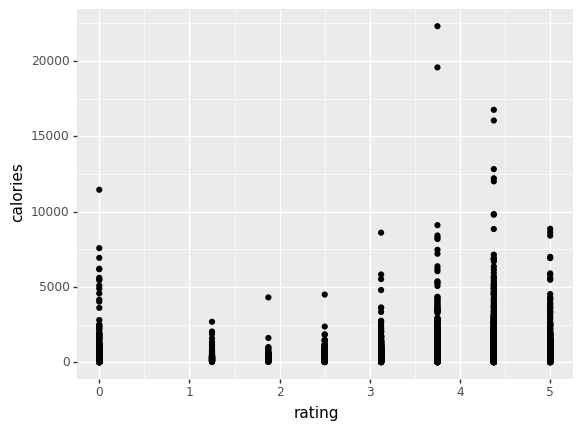

<ggplot: (698090334)>

In [76]:
(p9.ggplot(epicurious_num_3, p9.aes(x = 'rating', y = 'calories')) 
 + p9.geom_point())

\textcolor{blue}{This plot looks almost like a bar chart! You can see that the rating takes only certain values, which we may not have expected. There does not appear to be any relationship between} `rating` \textcolor{blue}{and} `calories`\textcolor{blue}{, which I think makes sense--for many people, the goodness of the recipe does not inform how many calories are in it (although you might be able to make an argument for calories impacting the goodness of the recipe, particularly for people with a sweet tooth).}